In [1]:
%matplotlib inline

import importlib
import itertools
import numpy as np
import matplotlib.pyplot as plt
import hwutils as utils

from scipy.optimize import fsolve

### Generalization Error

In [39]:
class GeneralizationErrorBound:
    __starting_estimate = 5e-3
    
    def __init__(self, VC_dimension, delta):
        # natural log of growth function approximate bound
        self.log_growth = lambda N: N * np.log(2) if N <= VC_dimension else VC_dimension * np.log(N)
        self.delta = delta
    
    def VC(self, N):
        return np.sqrt(8 / N * (np.log(4 / self.delta) + self.log_growth(2 * N)))
    
    def Rademacher_penalty(self, N):
        return np.sqrt(2 / N * (np.log(2 * N) + self.log_growth(N))) \
             + np.sqrt(2 / N * np.log(1 / self.delta)) \
             + 1 / N
    
    def Parrondo_VandenBroek(self, N):
        func = lambda epsilon: epsilon \
            - np.sqrt(1 / N * (2 * epsilon + np.log(6 / self.delta) + self.log_growth(2 * N)))
        return fsolve(func, x0=self.__starting_estimate)
        
    def Devroye(self, N):
        func = lambda epsilon: epsilon \
            - np.sqrt((4 * epsilon * (1 + epsilon) + np.log(4 / delta) + self.log_growth(N ** 2)) / 2 / N)
        return fsolve(func, x0=self.__starting_estimate)        

**Problem 1**

In [45]:
bound = GeneralizationErrorBound(VC_dimension=10, delta=0.05)
epsilon_max = 0.05

for N in itertools.count(start=1, step=1):
    if bound.VC(N) <= epsilon_max:
        print(N)
        break

452957


**Problem 2, 3**

In [46]:
bound = GeneralizationErrorBound(VC_dimension=50, delta=0.05)
N = 5 #10000

print(("Bound values when N = {0}:\n"
       " VC = {1}\n"
       " Rademacher penalty = {2}\n"
       " Parrondo & Van den Broek = {3}\n"
       " Devroye = {4}") \
      .format(N, bound.VC(N), bound.Rademacher_penalty(N), bound.Parrondo_VandenBroek(N), bound.Devroye(N)))

Bound values when N = 5:
 VC = 4.254597220000659
 Rademacher penalty = 2.813654929686762
 Parrondo & Van den Broek = [ 1.7439536]
 Devroye = [ 2.26454076]


### Bias and Variance

**Problems 4, 5, 6**

In [225]:
sample_size = 2
n_points = 201
x_pop = np.linspace(-1, 1, n_points)
y_pop = np.sin(np.pi * x_pop)

n_hypothesis = int(1e3)
slopes = []
for _ in range(n_hypothesis):
    sample_idxs = np.random.choice(n_points, size=sample_size, replace=False)
    x = x_pop[sample_idxs]
    y = y_pop[sample_idxs]
    slope = (x @ y) / (x @ x)  # OLS solution for the case when x is a vector
    
    slopes.append(slope)

slope_bar = np.mean(slopes)

In [233]:
slope_bar

1.4248164879245944

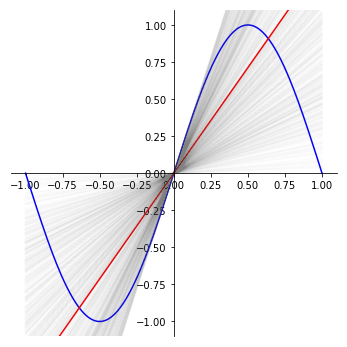

In [232]:
INTERVAL = np.array([-1, 1])

plt.figure(figsize=(8,6))
ax = plt.gca()

plt.xlim(*INTERVAL*1.1)
plt.ylim(*INTERVAL*1.1)
for pos in ['right', 'top']:   ax.spines[pos].set_color('none')
for pos in ['left', 'bottom']: ax.spines[pos].set_position('zero')
ax.set_aspect('equal')

plt.plot(x_pop, y_pop, color = 'blue')
plt.plot(INTERVAL,  slope_bar * INTERVAL, color = 'red')
for slope in slopes:
    plt.plot(INTERVAL,  slope * INTERVAL, color = 'gray', alpha = 0.01)

plt.show()